In [1]:
import numpy as np
import cv2 as cv
import math
import matplotlib.pyplot as plt
import pandas as pd
import imutils.paths as path 

from tqdm import tqdm

In [2]:
PATH = 'D:\Kuliah\SKRIPSI\Kakao\dataset_kakao'
imagePaths = sorted(list(path.list_images(PATH)))

In [3]:
data = []
for i in tqdm(imagePaths, desc='load'):
    imgg = cv.imread(i)
    resized_img = cv.resize(imgg, (32, 43))  # Resize dulu
    gray_img = cv.cvtColor(resized_img, cv.COLOR_BGR2GRAY)  # Kemudian grayscale
    data.append(gray_img)

load: 100%|██████████| 62/62 [00:00<00:00, 3245.35it/s]


In [4]:
# Fungsi Derajat 0°
def derajat0(img):
    max_val = np.max(img)
    imgTmp = np.zeros([max_val+1, max_val+1])
    
    for i in range(len(img)):
        for j in range(len(img[i])-1):  # Horizontal (kanan)
            imgTmp[img[i][j], img[i][j+1]] += 1

    transpos = np.transpose(imgTmp)
    data = imgTmp + transpos

    tmp = np.sum(data)
    data /= tmp
    return data

# Fungsi Derajat 45°
def derajat45(img):
    max_val = np.max(img)
    imgTmp = np.zeros([max_val+1, max_val+1])
    
    for i in range(1, len(img)):
        for j in range(len(img[i])-1):  # Diagonal (kanan atas)
            imgTmp[img[i][j], img[i-1][j+1]] += 1

    transpos = np.transpose(imgTmp)
    data = imgTmp + transpos

    tmp = np.sum(data)
    data /= tmp
    return data

# Fungsi Derajat 90°
def derajat90(img):
    max_val = np.max(img)
    imgTmp = np.zeros([max_val+1, max_val+1])
    
    for i in range(1, len(img)):  # Vertikal (atas)
        for j in range(len(img[i])):
            imgTmp[img[i][j], img[i-1][j]] += 1

    transpos = np.transpose(imgTmp)
    data = imgTmp + transpos

    tmp = np.sum(data)
    data /= tmp
    return data

# Fungsi Derajat 135°
def derajat135(img):
    max_val = np.max(img)
    imgTmp = np.zeros([max_val+1, max_val+1])
    
    for i in range(1, len(img)):
        for j in range(1, len(img[i])):  # Diagonal (kiri atas)
            imgTmp[img[i][j], img[i-1][j-1]] += 1

    transpos = np.transpose(imgTmp)
    data = imgTmp + transpos

    tmp = np.sum(data)
    data /= tmp
    return data

In [5]:
hasil = []
for i in tqdm((range (len(data))), desc='GLCM'):
    dat= []
    dat.append(derajat0(data[i]))
    dat.append(derajat45(data[i]))
    dat.append(derajat90(data[i]))
    dat.append(derajat135(data[i]))
    hasil.append(dat)

GLCM: 100%|██████████| 62/62 [00:00<00:00, 230.03it/s]


In [6]:
# Fungsi untuk menghitung contrast
def contrast(data):
    contrast_val = 0
    for i in range(len(data)):
        for j in range(len(data)):
            contrast_val += data[i,j] * pow(i-j, 2)
    return contrast_val

In [7]:
# Fungsi untuk menghitung entropy
def entropy(data):
    entropy_val = 0
    for i in range(len(data)):
        for j in range(len(data)):
            if data[i,j] > 0:
                entropy_val += - (data[i,j] * math.log(data[i,j]))
    return entropy_val

In [8]:
# Fungsi untuk menghitung homogenitas
def homogenitas(data):
    homogenitas_val = 0
    for i in range(len(data)):
        for j in range(len(data)):
            homogenitas_val += data[i,j] * (1 + (pow(i-j, 2)))
    return homogenitas_val

In [9]:
# Fungsi untuk menghitung energy
def energy(data):
    energy_val = 0
    for i in range(len(data)):
        for j in range(len(data)):
            energy_val += data[i,j] ** 2
    return energy_val

In [10]:
# Proses ekstraksi RGB dan grayscale
hasilnya = []

for j in tqdm(range(len(hasil)), desc='Ekstraksi'):
    da = []
    da.append(imagePaths[j])
    
    # Baca gambar asli lagi untuk mendapatkan nilai RGB dan grayscale
    imgg = cv.imread(imagePaths[j])
    resized_img = cv.resize(imgg, (32, 43))  # Resize image
    gray_img = cv.cvtColor(resized_img, cv.COLOR_BGR2GRAY)
    
    # Hitung rata-rata R, G, B
    avg_r = np.mean(resized_img[:, :, 2])  # Kanal merah (R)
    avg_g = np.mean(resized_img[:, :, 1])  # Kanal hijau (G)
    avg_b = np.mean(resized_img[:, :, 0])  # Kanal biru (B)
    
    # Hitung rata-rata grayscale
    avg_gray = np.mean(gray_img)
    
    # Tambahkan nilai R, G, B, dan grayscale ke daftar
    da.append(avg_r)
    da.append(avg_g)
    da.append(avg_b)
    da.append(avg_gray)
    
    # Ekstraksi GLCM
    for i in hasil[j]:
        dx = energy(i)
        da.append(dx)

        dh = homogenitas(i)
        da.append(dh)

        den = entropy(i)
        da.append(den)

        dco = contrast(i)
        da.append(dco)

    hasilnya.append(da)


Ekstraksi: 100%|██████████| 62/62 [00:18<00:00,  3.33it/s]


In [11]:
namatabel = ['file', 'avg_R', 'avg_G', 'avg_B', 'avg_grayscale', 
             'energy_0', 'homogenitas_0', 'entropy_0', 'contrast_0', 
             'energy_45', 'homogenitas_45', 'entropy_45', 'contrast_45',
             'energy_90', 'homogenitas_90', 'entropy_90', 'contrast_90', 
             'energy_135', 'homogenitas_135', 'entropy_135', 'contrast_135']
df = pd.DataFrame(hasilnya, columns=namatabel)

In [12]:
df.head()
df.shape

(62, 21)

In [13]:
df

file       avg_R       avg_G  \
0   D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\healthy1...  167.330669  141.304506   
1   D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\healthy8...  195.838663  167.524709   
2   D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\healthy8...  195.396802  136.525436   
3   D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\healthy8...  182.253634  156.154070   
4   D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\healthy8...  159.629360  113.136628   
..                                                ...         ...         ...   
57  D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\phytopht...  172.139535  153.027616   
58  D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\phytopht...  160.443314  119.247093   
59  D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\phytopht...  180.795785  149.758721   
60  D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\phytopht...  184.170785  162.387355   
61  D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\phytopht...  156.928052  129.741279   

         avg_B  avg_grayscale  energy_0  homogenitas_0  entropy_0  \
0   144.404070     149.433866  0.039669    1183.916729   5.983636   
1   164.731105     175.655523  0.066730     756.364591   5.593014   
2   132.470203     153.653343  0.012311     760.389347   6.536436   
3   162.100291     164.632267  0.015513    1284.380345   6.710772   
4   125.544331     128.454942  0.006929    1112.046512   6.948334   
..         ...            ...       ...            ...        ...   
57  152.499273     158.692587  0.012991     806.343586   6.689354   
58  122.186047     131.893169  0.004091     975.556639   7.110375   
59  143.757267     158.353198  0.024628     680.713428   6.432822   
60  166.250000     169.336483  0.039810    1073.855214   6.091023   
61  120.791424     136.859738  0.002670     808.151538   7.371438   

     contrast_0  energy_45  ...  entropy_45  contrast_45  energy_90  \
0   1182.916729   0.037211  ...    5.962366   828.537634   0.043967   
1    755.364591   0.057723  ...    5.631760   533.014593   0.060906   
2    759.389347   0.009326  ...    6.695866  1501.630568   0.011515   
3   1283.380345   0.012418  ...    6.788814  1834.271121   0.014571   
4   1111.046512   0.005335  ...    7.037612  1527.529954   0.007129   
..          ...        ...  ...         ...          ...        ...   
57   805.343586   0.009622  ...    6.828423  1289.330261   0.013888   
58   974.556639   0.003058  ...    7.192612  1373.503840   0.003498   
59   679.713428   0.017666  ...    6.591860  1341.078341   0.020257   
60  1072.855214   0.033012  ...    6.257683  2000.409370   0.041108   
61   807.151538   0.002105  ...    7.392510  1147.942396   0.002788   

    homogenitas_90  entropy_90  contrast_90  energy_135  homogenitas_135  \
0       734.822173    5.867349   733.822173    0.035344      2466.510753   
1       721.136905    5.653274   720.136905    0.055559      1808.822581   
2       722.642113    6.503344   721.642113    0.009677      1008.569892   
3      1427.281250    6.724166  1426.281250    0.011694      2557.798771   
4       851.715030    6.886013   850.715030    0.005616      1652.311060   
..             ...         ...          ...         ...              ...   
57      617.728423    6.650209   616.728423    0.010934       974.344854   
58      742.747024    7.111004   741.747024    0.002768      1519.470814   
59      676.130208    6.443749   675.130208    0.019240       869.179724   
60      732.640625    6.059936   731.640625    0.036243       760.471582   
61      674.763393    7.321340   673.763393    0.001992      1246.307988   

    entropy_135  contrast_135  
0      6.159601   2465.510753  
1      5.831914   1807.822581  
2      6.599170   1007.569892  
3      6.833270   2556.798771  
4      7.006333   1651.311060  
..          ...           ...  
57     6.729272    973.344854  
58     7.229459   1518.470814  
59     6.529462    868.179724  
60     6.076586    759.471582  
61     7.426753   1245.307988  

[62 rows x 21 columns]

In [14]:
df.to_csv(r'newdata.csv', index = False)
print('Data berhasil diekstraksi')

Data berhasil diekstraksi


### KNN

In [15]:
import seaborn as sns
sns.set()

In [16]:
kakao = pd.read_csv('newdata.csv')

In [17]:
result = []
for value in range(1, 63):
    if value <= 21:
        result.append('Healthy')
    elif value <= 42:
        result.append('Monilia')
    else:
        result.append('Phytophthora')

kakao['label'] = result

In [18]:
kakao

file       avg_R       avg_G  \
0   D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\healthy1...  167.330669  141.304506   
1   D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\healthy8...  195.838663  167.524709   
2   D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\healthy8...  195.396802  136.525436   
3   D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\healthy8...  182.253634  156.154070   
4   D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\healthy8...  159.629360  113.136628   
..                                                ...         ...         ...   
57  D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\phytopht...  172.139535  153.027616   
58  D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\phytopht...  160.443314  119.247093   
59  D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\phytopht...  180.795785  149.758721   
60  D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\phytopht...  184.170785  162.387355   
61  D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\phytopht...  156.928052  129.741279   

         avg_B  avg_grayscale  energy_0  homogenitas_0  entropy_0  \
0   144.404070     149.433866  0.039669    1183.916729   5.983636   
1   164.731105     175.655523  0.066730     756.364591   5.593014   
2   132.470203     153.653343  0.012311     760.389347   6.536436   
3   162.100291     164.632267  0.015513    1284.380345   6.710772   
4   125.544331     128.454942  0.006929    1112.046512   6.948334   
..         ...            ...       ...            ...        ...   
57  152.499273     158.692587  0.012991     806.343586   6.689354   
58  122.186047     131.893169  0.004091     975.556639   7.110375   
59  143.757267     158.353198  0.024628     680.713428   6.432822   
60  166.250000     169.336483  0.039810    1073.855214   6.091023   
61  120.791424     136.859738  0.002670     808.151538   7.371438   

     contrast_0  energy_45  ...  contrast_45  energy_90  homogenitas_90  \
0   1182.916729   0.037211  ...   828.537634   0.043967      734.822173   
1    755.364591   0.057723  ...   533.014593   0.060906      721.136905   
2    759.389347   0.009326  ...  1501.630568   0.011515      722.642113   
3   1283.380345   0.012418  ...  1834.271121   0.014571     1427.281250   
4   1111.046512   0.005335  ...  1527.529954   0.007129      851.715030   
..          ...        ...  ...          ...        ...             ...   
57   805.343586   0.009622  ...  1289.330261   0.013888      617.728423   
58   974.556639   0.003058  ...  1373.503840   0.003498      742.747024   
59   679.713428   0.017666  ...  1341.078341   0.020257      676.130208   
60  1072.855214   0.033012  ...  2000.409370   0.041108      732.640625   
61   807.151538   0.002105  ...  1147.942396   0.002788      674.763393   

    entropy_90  contrast_90  energy_135  homogenitas_135  entropy_135  \
0     5.867349   733.822173    0.035344      2466.510753     6.159601   
1     5.653274   720.136905    0.055559      1808.822581     5.831914   
2     6.503344   721.642113    0.009677      1008.569892     6.599170   
3     6.724166  1426.281250    0.011694      2557.798771     6.833270   
4     6.886013   850.715030    0.005616      1652.311060     7.006333   
..         ...          ...         ...              ...          ...   
57    6.650209   616.728423    0.010934       974.344854     6.729272   
58    7.111004   741.747024    0.002768      1519.470814     7.229459   
59    6.443749   675.130208    0.019240       869.179724     6.529462   
60    6.059936   731.640625    0.036243       760.471582     6.076586   
61    7.321340   673.763393    0.001992      1246.307988     7.426753   

    contrast_135         label  
0    2465.510753       Healthy  
1    1807.822581       Healthy  
2    1007.569892       Healthy  
3    2556.798771       Healthy  
4    1651.311060       Healthy  
..           ...           ...  
57    973.344854  Phytophthora  
58   1518.470814  Phytophthora  
59    868.179724  Phytophthora  
60    759.471582  Phytophthora  
61   1245.307988  Phytophthora  

[62 rows x 22 columns]

In [19]:
kakao.head()

file       avg_R       avg_G  \
0  D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\healthy1...  167.330669  141.304506   
1  D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\healthy8...  195.838663  167.524709   
2  D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\healthy8...  195.396802  136.525436   
3  D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\healthy8...  182.253634  156.154070   
4  D:\Kuliah\SKRIPSI\Kakao\dataset_kakao\healthy8...  159.629360  113.136628   

        avg_B  avg_grayscale  energy_0  homogenitas_0  entropy_0   contrast_0  \
0  144.404070     149.433866  0.039669    1183.916729   5.983636  1182.916729   
1  164.731105     175.655523  0.066730     756.364591   5.593014   755.364591   
2  132.470203     153.653343  0.012311     760.389347   6.536436   759.389347   
3  162.100291     164.632267  0.015513    1284.380345   6.710772  1283.380345   
4  125.544331     128.454942  0.006929    1112.046512   6.948334  1111.046512   

   energy_45  ...  contrast_45  energy_90  homogenitas_90  entropy_90  \
0   0.037211  ...   828.537634   0.043967      734.822173    5.867349   
1   0.057723  ...   533.014593   0.060906      721.136905    5.653274   
2   0.009326  ...  1501.630568   0.011515      722.642113    6.503344   
3   0.012418  ...  1834.271121   0.014571     1427.281250    6.724166   
4   0.005335  ...  1527.529954   0.007129      851.715030    6.886013   

   contrast_90  energy_135  homogenitas_135  entropy_135  contrast_135  \
0   733.822173    0.035344      2466.510753     6.159601   2465.510753   
1   720.136905    0.055559      1808.822581     5.831914   1807.822581   
2   721.642113    0.009677      1008.569892     6.599170   1007.569892   
3  1426.281250    0.011694      2557.798771     6.833270   2556.798771   
4   850.715030    0.005616      1652.311060     7.006333   1651.311060   

     label  
0  Healthy  
1  Healthy  
2  Healthy  
3  Healthy  
4  Healthy  

[5 rows x 22 columns]

In [20]:
df.to_excel(r'newdata_label.xlsx', index = False)
print('Data berhasil diekstraksi')

Data berhasil diekstraksi


In [21]:
kakao.describe()

avg_R       avg_G       avg_B  avg_grayscale   energy_0  \
count   62.000000   62.000000   62.000000      62.000000  62.000000   
mean   167.612739  151.614908  144.273197     155.563133   0.022301   
std     22.272542   22.642722   22.742072      20.970352   0.020948   
min    100.042878   98.269622   90.578488      97.949128   0.002243   
25%    153.698765  137.100836  128.549055     142.162609   0.009079   
50%    171.200218  152.820858  143.470203     157.698765   0.014183   
75%    182.233648  167.307413  163.134266     169.142987   0.028603   
max    209.154070  217.186773  196.622093     206.047965   0.101022   

       homogenitas_0  entropy_0   contrast_0  energy_45  homogenitas_45  \
count      62.000000  62.000000    62.000000  62.000000       62.000000   
mean     1031.947523   6.538107  1030.947523   0.019124     1415.361801   
std       343.081312   0.462335   343.081312   0.019655      560.365791   
min       291.342086   5.330751   290.342086   0.001822      460.836406   
25%       784.673668   6.257600   783.673668   0.007115     1038.387865   
50%       969.632783   6.644320   968.632783   0.011717     1345.942780   
75%      1246.162791   6.893080  1245.162791   0.022679     1761.274770   
max      2009.757689   7.371438  2008.757689   0.103409     2858.314900   

       entropy_45  contrast_45  energy_90  homogenitas_90  entropy_90  \
count   62.000000    62.000000  62.000000       62.000000   62.000000   
mean     6.621816  1414.361801   0.022892      749.355259    6.460528   
std      0.460039   560.365791   0.021157      257.135032    0.467994   
min      5.345357   459.836406   0.002355      209.236607    5.257688   
25%      6.363616  1037.387865   0.009957      580.302827    6.120985   
50%      6.706082  1344.942780   0.014866      702.539807    6.538309   
75%      6.969399  1760.274770   0.027765      856.057106    6.752996   
max      7.392510  2857.314900   0.104137     1427.281250    7.321340   

       contrast_90  energy_135  homogenitas_135  entropy_135  contrast_135  
count    62.000000   62.000000        62.000000    62.000000     62.000000  
mean    748.355259    0.018981      1532.331351     6.632939   1531.331351  
std     257.135032    0.018932       646.156383     0.459115    646.156383  
min     208.236607    0.001846       351.430876     5.499313    350.430876  
25%     579.302827    0.007400      1012.409946     6.341192   1011.409946  
50%     701.539807    0.011325      1426.953917     6.734918   1425.953917  
75%     855.057106    0.024031      1789.654762     6.949453   1788.654762  
max    1426.281250    0.093297      3278.226575     7.426753   3277.226575

In [22]:
kakao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   file             62 non-null     object 
 1   avg_R            62 non-null     float64
 2   avg_G            62 non-null     float64
 3   avg_B            62 non-null     float64
 4   avg_grayscale    62 non-null     float64
 5   energy_0         62 non-null     float64
 6   homogenitas_0    62 non-null     float64
 7   entropy_0        62 non-null     float64
 8   contrast_0       62 non-null     float64
 9   energy_45        62 non-null     float64
 10  homogenitas_45   62 non-null     float64
 11  entropy_45       62 non-null     float64
 12  contrast_45      62 non-null     float64
 13  energy_90        62 non-null     float64
 14  homogenitas_90   62 non-null     float64
 15  entropy_90       62 non-null     float64
 16  contrast_90      62 non-null     float64
 17  energy_135       6

In [23]:
kakao_correlation = kakao.drop(columns=['file']).select_dtypes(include=[float, int]).corr()
kakao_correlation

avg_R     avg_G     avg_B  avg_grayscale  energy_0  \
avg_R            1.000000  0.699021  0.835264       0.863648  0.285931   
avg_G            0.699021  1.000000  0.864850       0.962579  0.405252   
avg_B            0.835264  0.864850  1.000000       0.936858  0.461969   
avg_grayscale    0.863648  0.962579  0.936858       1.000000  0.404714   
energy_0         0.285931  0.405252  0.461969       0.404714  1.000000   
homogenitas_0   -0.442675 -0.352584 -0.157039      -0.383369  0.161109   
entropy_0       -0.258907 -0.396929 -0.450595      -0.389412 -0.888651   
contrast_0      -0.442675 -0.352584 -0.157039      -0.383369  0.161109   
energy_45        0.270942  0.394040  0.441764       0.390352  0.995157   
homogenitas_45  -0.321727 -0.288278 -0.133460      -0.301258  0.006243   
entropy_45      -0.245946 -0.390909 -0.436815      -0.379773 -0.907828   
contrast_45     -0.321727 -0.288278 -0.133460      -0.301258  0.006243   
energy_90        0.284467  0.415033  0.467696       0.411155  0.994848   
homogenitas_90  -0.348829 -0.296224 -0.109673      -0.311978  0.054713   
entropy_90      -0.233020 -0.397389 -0.429388      -0.378862 -0.865163   
contrast_90     -0.348829 -0.296224 -0.109673      -0.311978  0.054713   
energy_135       0.281491  0.404104  0.458185       0.402113  0.998015   
homogenitas_135 -0.424277 -0.331044 -0.196467      -0.368785  0.124720   
entropy_135     -0.265119 -0.396607 -0.456696      -0.391940 -0.883550   
contrast_135    -0.424277 -0.331044 -0.196467      -0.368785  0.124720   

                 homogenitas_0  entropy_0  contrast_0  energy_45  \
avg_R                -0.442675  -0.258907   -0.442675   0.270942   
avg_G                -0.352584  -0.396929   -0.352584   0.394040   
avg_B                -0.157039  -0.450595   -0.157039   0.441764   
avg_grayscale        -0.383369  -0.389412   -0.383369   0.390352   
energy_0              0.161109  -0.888651    0.161109   0.995157   
homogenitas_0         1.000000  -0.143428    1.000000   0.150978   
entropy_0            -0.143428   1.000000   -0.143428  -0.858710   
contrast_0            1.000000  -0.143428    1.000000   0.150978   
energy_45             0.150978  -0.858710    0.150978   1.000000   
homogenitas_45        0.667826  -0.098443    0.667826  -0.023490   
entropy_45           -0.152576   0.992151   -0.152576  -0.885269   
contrast_45           0.667826  -0.098443    0.667826  -0.023490   
energy_90             0.170531  -0.885214    0.170531   0.994005   
homogenitas_90        0.766407  -0.043106    0.766407   0.036755   
entropy_90           -0.142880   0.990924   -0.142880  -0.837969   
contrast_90           0.766407  -0.043106    0.766407   0.036755   
energy_135            0.162183  -0.877552    0.162183   0.996557   
homogenitas_135       0.796541  -0.042534    0.796541   0.130599   
entropy_135          -0.152188   0.993670   -0.152188  -0.853066   
contrast_135          0.796541  -0.042534    0.796541   0.130599   

                 homogenitas_45  entropy_45  contrast_45  energy_90  \
avg_R                 -0.321727   -0.245946    -0.321727   0.284467   
avg_G                 -0.288278   -0.390909    -0.288278   0.415033   
avg_B                 -0.133460   -0.436815    -0.133460   0.467696   
avg_grayscale         -0.301258   -0.379773    -0.301258   0.411155   
energy_0               0.006243   -0.907828     0.006243   0.994848   
homogenitas_0          0.667826   -0.152576     0.667826   0.170531   
entropy_0             -0.098443    0.992151    -0.098443  -0.885214   
contrast_0             0.667826   -0.152576     0.667826   0.170531   
energy_45             -0.023490   -0.885269    -0.023490   0.994005   
homogenitas_45         1.000000   -0.028852     1.000000   0.019543   
entropy_45            -0.028852    1.000000    -0.028852  -0.905517   
contrast_45            1.000000   -0.028852     1.000000   0.019543   
energy_90              0.019543   -0.905517     0.019543   1.000000   
homogenitas_90         0.666507   -0.02893

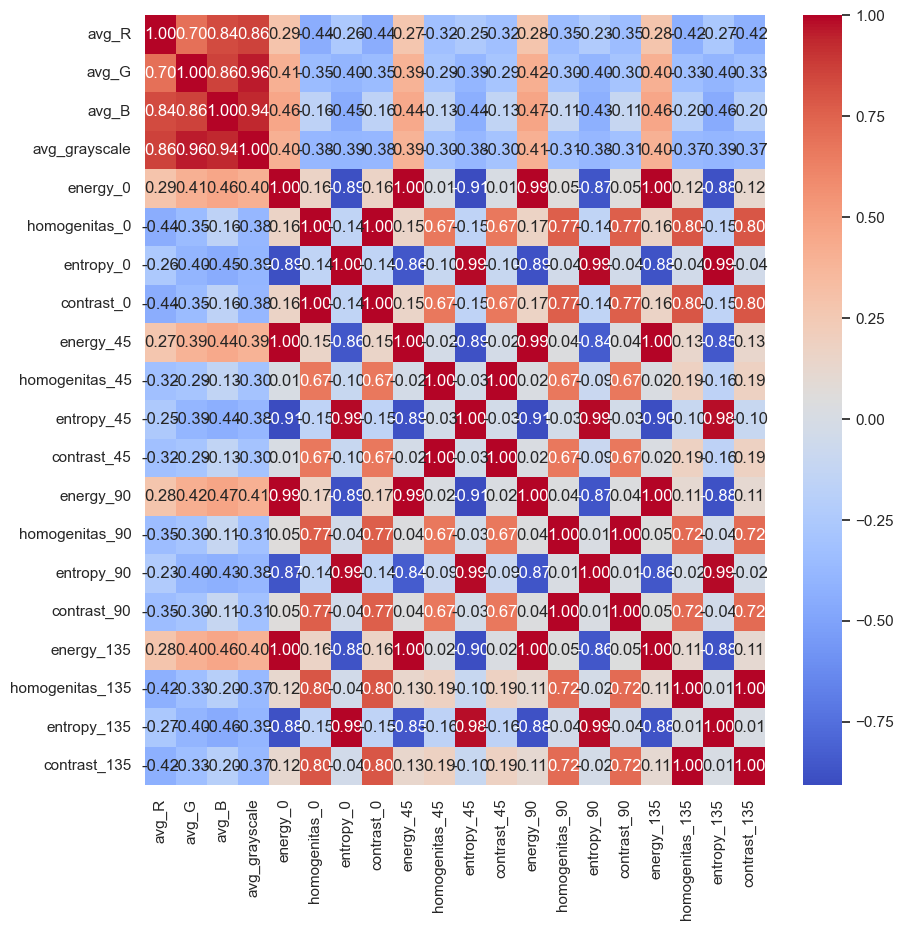

In [24]:
# Filter hanya kolom numerik
numeric_data = kakao.select_dtypes(include=[float, int])

# Buat heatmap menggunakan data numerik
f, axis = plt.subplots(figsize=(10, 10))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', ax=axis, cmap='coolwarm')

# Tampilkan heatmap
plt.show()

In [25]:
data = kakao[['energy_0', 'homogenitas_0', 'entropy_0', 'contrast_0', 
            'energy_45', 'homogenitas_45', 'entropy_45', 'contrast_45', 
            'energy_90', 'homogenitas_90', 'entropy_90', 'contrast_90', 
            'energy_135', 'homogenitas_135', 'entropy_135', 'contrast_135']].to_numpy()

In [26]:
print(data)

[[3.96690508e-02 1.18391673e+03 5.98363636e+00 1.18291673e+03
  3.72114507e-02 8.29537634e+02 5.96236594e+00 8.28537634e+02
  4.39674568e-02 7.34822173e+02 5.86734900e+00 7.33822173e+02
  3.53435339e-02 2.46651075e+03 6.15960073e+00 2.46551075e+03]
 [6.67301109e-02 7.56364591e+02 5.59301410e+00 7.55364591e+02
  5.77231413e-02 5.34014593e+02 5.63175955e+00 5.33014593e+02
  6.09058890e-02 7.21136905e+02 5.65327367e+00 7.20136905e+02
  5.55590950e-02 1.80882258e+03 5.83191440e+00 1.80782258e+03]
 [1.23108422e-02 7.60389347e+02 6.53643647e+00 7.59389347e+02
  9.32572127e-03 1.50263057e+03 6.69586648e+00 1.50163057e+03
  1.15150227e-02 7.22642113e+02 6.50334370e+00 7.21642113e+02
  9.67730137e-03 1.00856989e+03 6.59916958e+00 1.00756989e+03]
 [1.55130681e-02 1.28438035e+03 6.71077214e+00 1.28338035e+03
  1.24179745e-02 1.83527112e+03 6.78881428e+00 1.83427112e+03
  1.45712093e-02 1.42728125e+03 6.72416559e+00 1.42628125e+03
  1.16938728e-02 2.55779877e+03 6.83327020e+00 2.55679877e+03]
 [6.

In [27]:
label = kakao['label'].to_numpy()

In [28]:
(kakao['label'].unique())

array(['Healthy', 'Monilia', 'Phytophthora'], dtype=object)

### Model KNN

In [29]:
from sklearn.model_selection import train_test_split   
train_classx, test_classx, train_classy, test_classy = train_test_split(data, label, test_size=0.2, random_state=0)

In [30]:
data[0]

array([3.96690508e-02, 1.18391673e+03, 5.98363636e+00, 1.18291673e+03,
       3.72114507e-02, 8.29537634e+02, 5.96236594e+00, 8.28537634e+02,
       4.39674568e-02, 7.34822173e+02, 5.86734900e+00, 7.33822173e+02,
       3.53435339e-02, 2.46651075e+03, 6.15960073e+00, 2.46551075e+03])

In [31]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(data, label)
neigh.score(data, label)

0.7741935483870968

In [32]:
pred_class = neigh.predict(test_classx)
print(pred_class)
pred_class.shape

['Healthy' 'Monilia' 'Monilia' 'Phytophthora' 'Phytophthora' 'Healthy'
 'Healthy' 'Phytophthora' 'Healthy' 'Phytophthora' 'Monilia' 'Healthy'
 'Healthy']


(13,)

In [33]:
from sklearn.metrics import accuracy_score
score = accuracy_score(test_classy, pred_class)
print("model accuracy knn :", score*100, "%")

model accuracy knn : 84.61538461538461 %


In [34]:
from sklearn import metrics
print(metrics.classification_report(test_classy, pred_class))

              precision    recall  f1-score   support

     Healthy       0.67      1.00      0.80         4
     Monilia       1.00      0.60      0.75         5
Phytophthora       1.00      1.00      1.00         4

    accuracy                           0.85        13
   macro avg       0.89      0.87      0.85        13
weighted avg       0.90      0.85      0.84        13



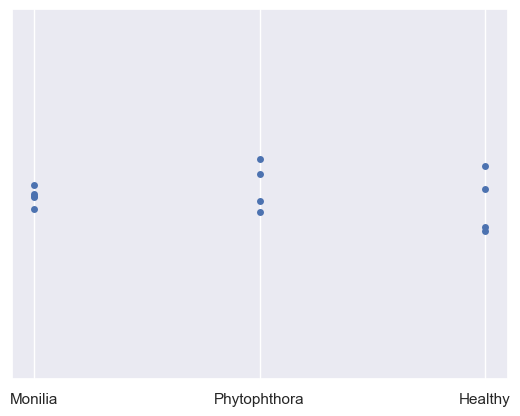

In [35]:
ax = sns.stripplot(x=test_classy)

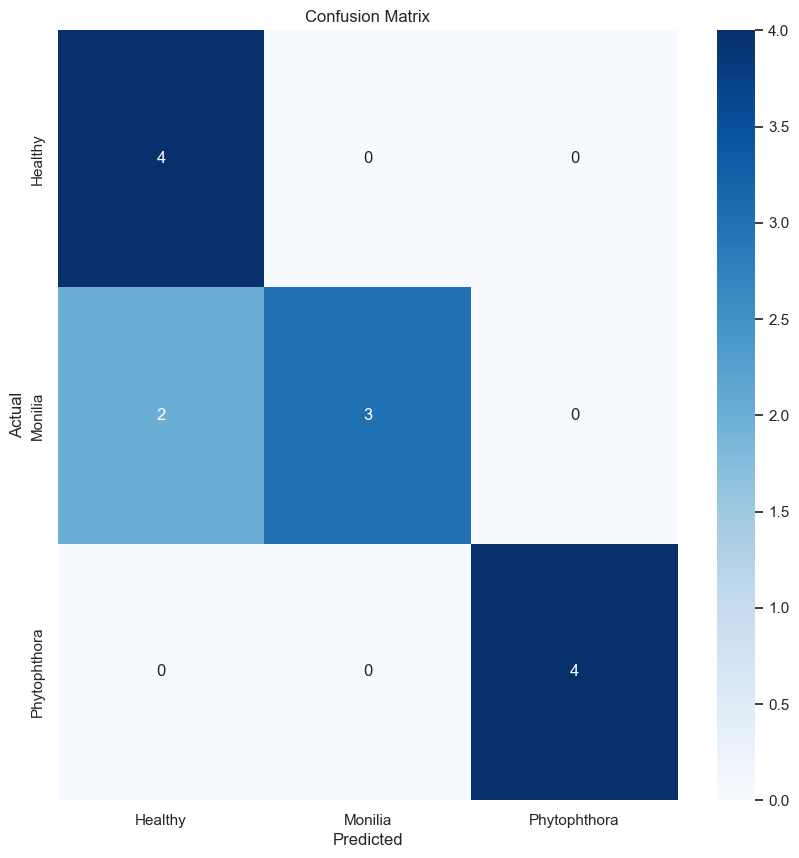

In [36]:
# Daftar label untuk menggantikan angka
labels = ['Healthy', 'Monilia', 'Phytophthora']

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_classy, pred_class)

# Visualisasi Confusion Matrix dengan label kustom
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### Save Model


In [37]:
import joblib
joblib.dump(neigh, 'model_knn.pkl')

['model_knn.pkl']

### Test Model


In [38]:
import pickle
from sklearn.neighbors import KNeighborsClassifier

# Misalkan model sudah dilatih
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(data, label)

# Simpan model ke file
with open('model_knn.pkl', 'wb') as model_file:
    pickle.dump(model_knn, model_file)


In [39]:
import pickle

# Muat model dari file
with open('model_knn.pkl', 'rb') as model_file:
    model_knn = pickle.load(model_file)

In [40]:
print(type(model_knn))  # Pastikan ini adalah KNeighborsClassifier

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>


### Tes Model

In [41]:
model = joblib.load('model_knn.pkl')

In [42]:
import cv2 as cv
import numpy as np
import joblib
import math

# Fungsi preprocessing gambar
def preprocess_image(image_path):
    # Baca gambar
    img = cv.imread(image_path)
    
    # Resize gambar ke ukuran yang sama dengan yang digunakan saat training
    resized_img = cv.resize(img, (32, 43))
    
    # Konversi gambar ke grayscale
    gray_img = cv.cvtColor(resized_img, cv.COLOR_BGR2GRAY)
    
    # Fungsi GLCM untuk derajat yang berbeda
    def glcm(img, angle):
        max_val = np.max(img)
        imgTmp = np.zeros([max_val+1, max_val+1])
        for i in range(len(img)-1):
            for j in range(len(img[i])-1):
                if angle == 0:
                    imgTmp[img[i][j], img[i,j+1]] += 1
                elif angle == 45:
                    if i > 0 and j < len(img[i])-1:
                        imgTmp[img[i][j], img[i-1,j+1]] += 1
                elif angle == 90:
                    if i > 0:
                        imgTmp[img[i][j], img[i-1,j]] += 1
                elif angle == 135:
                    if i > 0 and j > 0:
                        imgTmp[img[i][j], img[i-1,j-1]] += 1
        transpos = np.transpose(imgTmp)
        data = imgTmp + transpos
        data /= np.sum(data)
        return data

    # Fungsi untuk menghitung fitur
    def contrast(data):
        contrast_val = 0
        for i in range(len(data)):
            for j in range(len(data)):
                contrast_val += data[i,j] * pow(i-j, 2)
        return contrast_val

    def entropy(data):
        entropy_val = 0
        for i in range(len(data)):
            for j in range(len(data)):
                if data[i,j] > 0:
                    entropy_val += - (data[i,j] * math.log(data[i,j]))
        return entropy_val

    def homogenitas(data):
        homogenitas_val = 0
        for i in range(len(data)):
            for j in range(len(data)):
                homogenitas_val += data[i,j] * (1 + (pow(i-j, 2)))
        return homogenitas_val

    def energy(data):
        energy_val = 0
        for i in range(len(data)):
            for j in range(len(data)):
                energy_val += data[i,j] ** 2
        return energy_val

    # Ekstraksi GLCM dan fitur untuk setiap derajat
    angles = [0, 45, 90, 135]
    features = []
    for angle in angles:
        glcm_matrix = glcm(gray_img, angle)
        features.append(energy(glcm_matrix))
        features.append(homogenitas(glcm_matrix))
        features.append(entropy(glcm_matrix))
        features.append(contrast(glcm_matrix))

    return np.array(features).reshape(1, -1)  # Mengembalikan 16 fitur

# Load model K-NN yang sudah disimpan
model = joblib.load('model_knn.pkl')

# Gambar baru untuk prediksi
new_image_path = 'D:\Kuliah\SKRIPSI\Kakao\cacao_dataset\healthy1 .jpg'

# Preprocess gambar baru
new_image_features = preprocess_image(new_image_path)

# Prediksi menggunakan model yang sudah diload
predicted_label = model.predict(new_image_features)

# Hasil prediksi
print(f"Prediksi label untuk gambar baru: {predicted_label[0]}")


Prediksi label untuk gambar baru: Healthy
